Game 1  Mean:  19.83
Game 1  Prob Positive:  0.97


Game 2  Mean:  19.63
Game 2  Prob Positive:  0.63


Game 3  Mean:  19.94
Game 3  Prob Positive:  0.6




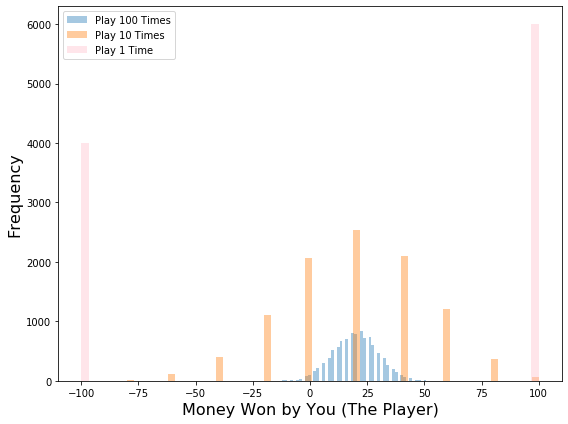

done


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# outer loop is Monte Carlo sims and inner loop is games played
def sim(bet,games,game,simulations=10000,threshold=40):
    sim_results = []
    for sim in range(simulations):
        result=[]
        for g in range(games):
            number = int(np.random.uniform()*100)  # get a random number to see who wins
            if number >= threshold:
                result.append(bet)
            else:
                result.append(-bet)
        sim_results.append(sum(result))          # sim_results_1 stores results for Game 1
    print('Game',game,' Mean: ', round(np.mean(sim_results), 2))
    print('Game',game,' Prob Positive: ', round(sum([1 for i in sim_results if i>0])/simulations, 2))
    print('\n')
    return sim_results
sim_results_1=sim(1,100,1)    
sim_results_2=sim(10,10,2)
sim_results_3=sim(100,1,3)
# Histogram that shows the distribution of the Monte Carlo Results for 2 spending levels
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(sim_results_1, kde=False, bins=60, label='Play 100 Times')
sns.distplot(sim_results_2, kde=False, bins=60, label='Play 10 Times')
sns.distplot(sim_results_3, kde=False, bins=60, label='Play 1 Time', color='pink')

ax.set_xlabel('Money Won by You (The Player)', fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='game_hist', dpi=150)
plt.show()
print('done')